In [1]:
# importing libraries

import pandas as pd

In [2]:
# Load the dataset 

df1 = pd.read_excel("english_converted_reviews.xlsx")
df1.sample(5)

,Unnamed: 0,order_id,review_score,reviews,reviews_en
1488,3309,a97a2be3f668f7c6d75a218b2dba8720,5,estrelas muito eficiente entrega feita dias ...,very efficient stars delivery made days before...
2106,3952,e11d8c8f1891edccae172ab330782a34,5,s´tenho agradecer e continuarei a comprar bom...,I only have to thank you and I will continue t...
1788,5802,fe84e8950d87d6b977d9871fd883b76f,2,prazo longo e atraso a loja pediu quase mês p...,long term and delay the store asked for almost...
2037,3761,33f11b444d480cee508b54f3cf17b079,1,não verifiquei sobre a essa empresa targaryen...,I didn’t check on this targaryen company befor...
1129,2866,c7c04230198e37566eee8abf31314112,5,farol de led chegou no prazo produto bom,led headlight arrived on time good product


In [3]:
df1.columns

Index(['Unnamed: 0', 'order_id', 'review_score', 'reviews', 'reviews_en'], dtype='object')

In [4]:
# Dropping unnecessary Columns

df1.drop(['Unnamed: 0', 'order_id', 'review_score', 'reviews'], axis=1, inplace=True)

In [5]:
df1.head()

,reviews_en
0,all very well
1,delay in delivery I hated the service and neve...
2,very good product
3,my product did not arrive according to the scr...
4,product failed during use


### Removing Null Values

In [6]:
df1.reviews_en.isnull().sum()

9

In [7]:
df1.dropna(inplace=True)

In [8]:
df1.reviews_en.isnull().sum()

0

## Sentiment Analysis using Textblob

### Using textblob library we can easily analysis sentiment from sentences. there is another Library called VaderSentiment, That is also use for sentiment analysis.But here we use Textblob. It is most popular library for sentiment analysis. Since Textblob is only support English Language , so i converted reviews(portugues) into English.

In [9]:
# importing textblob library

from textblob import TextBlob

In [10]:
# Creating a function that take a sentence and analysis the sentiment of the sentence . this function return polarity score. The polarity score is a float within the range [-1.0, 1.0].. if polarity score is less than 0 it means Negative Sentiment and if greater than 0 it means Positive Sentiment. If it is 0, sentiment maybe neutral. in this problem we void neutral sentiment. we take neutral sentiment as negative sentiment.


def text_b(texts):
    strings = str(texts)
    senti = TextBlob(strings)
    polar_score = senti.sentiment.polarity
    
    if polar_score > 0:
        return 1
    else:
        return 0

lambda x: text_clean_1(x)

<function __main__.<lambda>(x)>

In [11]:
df1['labels'] = pd.DataFrame(df1['reviews_en'].apply(lambda x: text_b(x)))


In [12]:
df1.head(10)

,reviews_en,labels
0,all very well,1
1,delay in delivery I hated the service and neve...,0
2,very good product,1
3,my product did not arrive according to the scr...,0
4,product failed during use,0
5,super show product recommend professional qual...,1
6,so far I haven't received the product,1
7,the store advertises a product and delivers an...,0
8,very good and fast when I saw it had already a...,1
9,the product arrived very well,1


### Visualize the Labels data


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\uf ruman\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


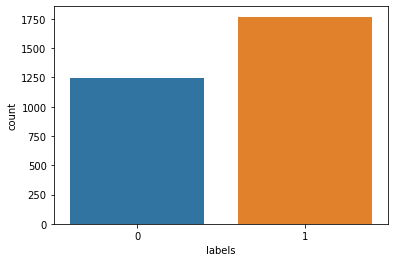

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(df1['labels'])
plt.show()

### Saving the dataframe

In [15]:
df1.to_excel("labelled_textbolb.xlsx", index = False)